# Import the mRNA expression data, calculate adjacency matrix using correlation between samples and build the network using igraph library¶


In [7]:
import pandas as pd
import igraph
import numpy as np
import cairocffi


In [5]:
df=pd.read_table('GSE39582_Expression.tsv',sep='\t')
dff=df.iloc[:10,:20]
data_corr=dff.corr()
np.fill_diagonal(data_corr.values, 0)
matrix=data_corr.as_matrix()


In [8]:
#create a network from adjacency matrix
g = igraph.Graph.Adjacency((matrix > 0).tolist())#
g.es['weight'] = matrix[matrix.nonzero()]
g.vs['label'] = dff.columns
#g.write_gml('igraph.gml')

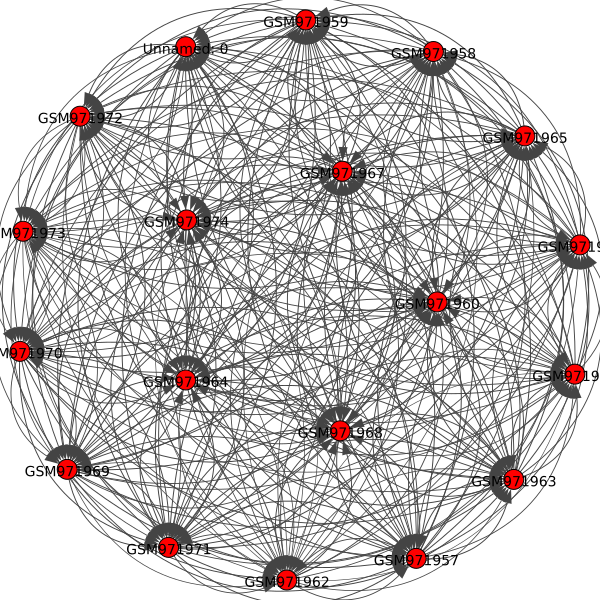

In [9]:
#Plotting
layout=g.layout_kamada_kawai()
visual_style = {}
visual_style["edge_width"]=[weights for weights in g.es['weight']]
visual_style["layout"] = layout
out=plot(g, **visual_style)
out
#out.save('igraph.png')

In [ ]:
#visual_style = {}
# visual_style["vertex_size"] = 20
# visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
#visual_style["vertex_label"] = g.vs["name"]
#visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
#visual_style["layout"] = layout
#visual_style["bbox"] = (300, 300)
#visual_style["margin"] = 20
# plot(g, **visual_style)